In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from preprocess import PreprocessData
from plot import PlotData
from data_loader import load_data

In [2]:
plotter = PlotData()
raw_data = load_data(data_root="data")
processor = PreprocessData(raw_data=raw_data)
data = processor.get_data()

No handles with labels found to put in legend.


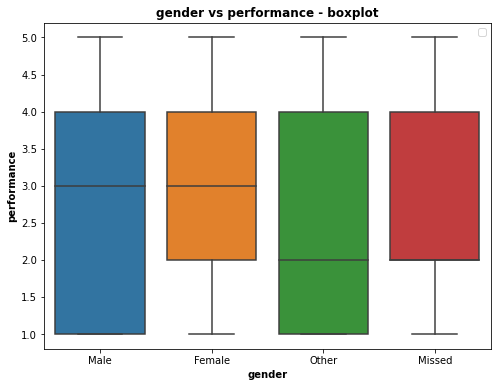

In [3]:
plotter.plot(data, "gender_str", "performance", sns.boxplot)

In [4]:
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,race_str,engnat_str,gender_str,hand_str,source_str,E_score,N_score,A_score,C_score,O_score
0,3,53,1,1,1,1,US,4,2,5,...,European,Yes,Male,Right,Web,85.0,2.5,90.0,92.5,82.5
1,13,46,1,2,1,1,US,2,2,3,...,Other,Yes,Female,Right,Web,30.0,52.5,62.5,80.0,40.0
2,1,14,2,2,1,1,PK,5,1,1,...,Mixed,No,Female,Right,Web,62.5,90.0,70.0,97.5,87.5
3,3,19,2,2,1,1,RO,2,5,2,...,European,No,Female,Right,Web,30.0,82.5,67.5,40.0,77.5
4,11,25,2,2,1,2,US,3,1,3,...,South East Asian,No,Female,Right,Google,60.0,50.0,85.0,60.0,60.0


In [5]:
data.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10', 'performance', 'race_str', 'engnat_str', 'gender_str',
       'hand_str', 'source_str', 'E_score', 'N_score', 'A_score', 'C_score',
       'O_score'],
      dtype='object')

In [7]:
data.head()

,performance,race_str,engnat_str,gender_str,hand_str,source_str,E_score,N_score,A_score,C_score,O_score
0,2.0,European,Yes,Male,Right,Web,85.0,2.5,90.0,92.5,82.5
1,2.0,Other,Yes,Female,Right,Web,30.0,52.5,62.5,80.0,40.0
2,5.0,Mixed,No,Female,Right,Web,62.5,90.0,70.0,97.5,87.5
3,5.0,European,No,Female,Right,Web,30.0,82.5,67.5,40.0,77.5
4,3.0,South East Asian,No,Female,Right,Google,60.0,50.0,85.0,60.0,60.0


No handles with labels found to put in legend.


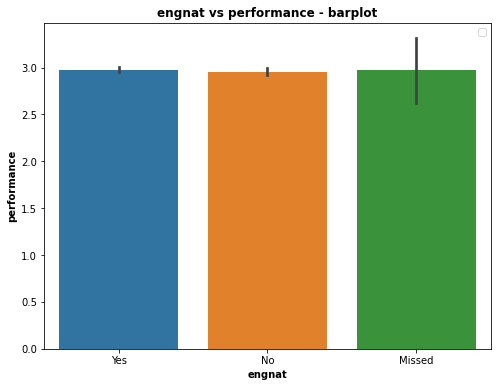

In [8]:
plotter.plot(data, "engnat_str", "performance", sns.barplot)

No handles with labels found to put in legend.


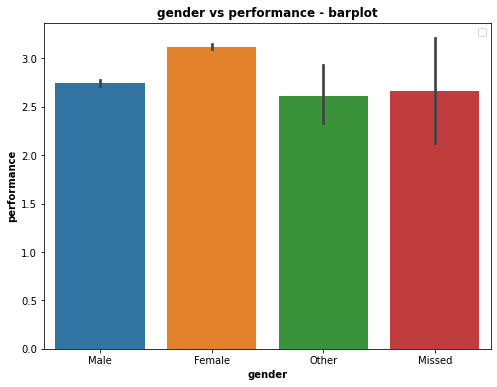

In [9]:
plotter.plot(data, "gender_str", "performance", sns.barplot)

No handles with labels found to put in legend.


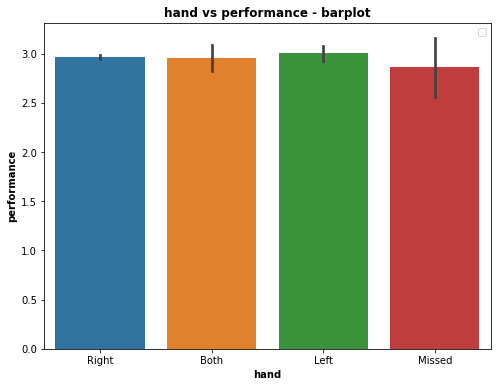

In [10]:
plotter.plot(data, "hand_str", "performance", sns.barplot)

No handles with labels found to put in legend.


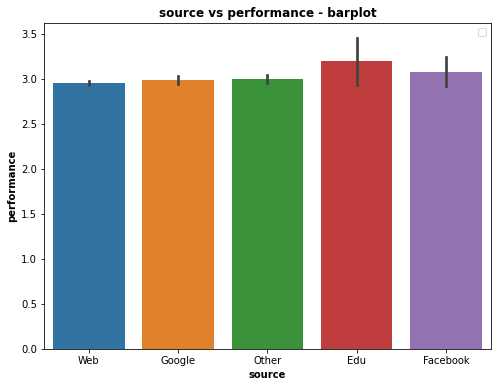

In [11]:
plotter.plot(data, "source_str", "performance", sns.barplot)

No handles with labels found to put in legend.


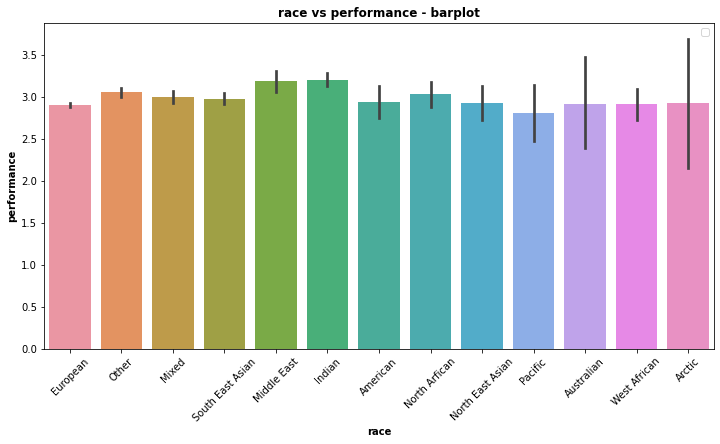

In [4]:
plotter.plot(data, "race_str", "performance", sns.barplot, figsize=(12,6), rotation=45)

In [5]:
data.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,E_score,N_score,A_score,C_score,O_score,E_level,N_level,A_level,C_level,O_level
0,3,53,1,1,1,1,US,4,2,5,...,85.0,2.5,90.0,92.5,82.5,high,ext_low,high,ext_high,high
1,13,46,1,2,1,1,US,2,2,3,...,30.0,52.5,62.5,80.0,40.0,lower,neutral,moderate,high,neutral
2,1,14,2,2,1,1,PK,5,1,1,...,62.5,90.0,70.0,97.5,87.5,moderate,high,moderate,ext_high,high
3,3,19,2,2,1,1,RO,2,5,2,...,30.0,82.5,67.5,40.0,77.5,lower,high,moderate,neutral,high
4,11,25,2,2,1,2,US,3,1,3,...,60.0,50.0,85.0,60.0,60.0,neutral,neutral,high,neutral,neutral


No handles with labels found to put in legend.


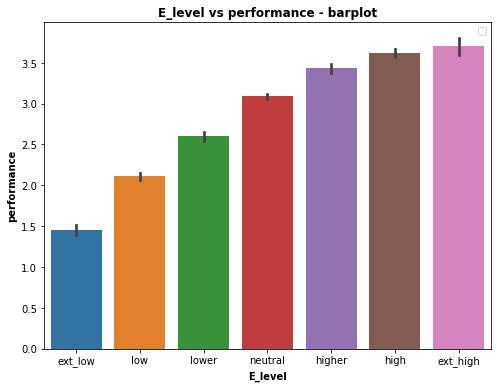

In [3]:
order = ["ext_low", "low", "lower", "neutral", "higher", "high", "ext_high"]
plotter.plot(data, "E_level", "performance", sns.barplot, order=order)

No handles with labels found to put in legend.


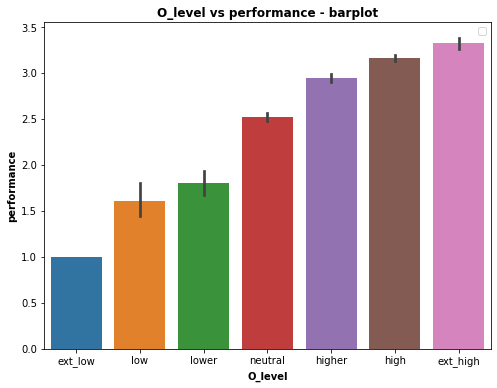

In [4]:
plotter.plot(data, "O_level", "performance", sns.barplot, order=order)

No handles with labels found to put in legend.


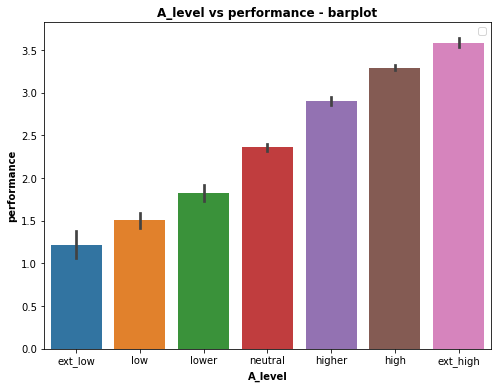

In [5]:
plotter.plot(data, "A_level", "performance", sns.barplot, order=order)

No handles with labels found to put in legend.


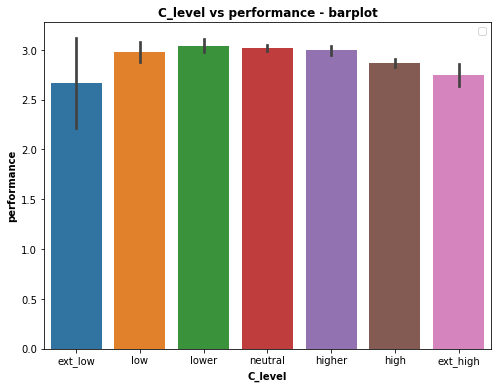

In [6]:
plotter.plot(data, "C_level", "performance", sns.barplot, order=order)

No handles with labels found to put in legend.


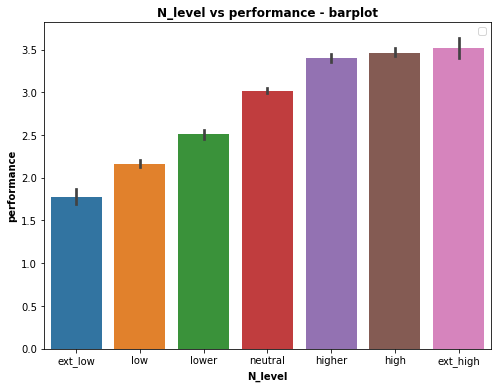

In [7]:
plotter.plot(data, "N_level", "performance", sns.barplot, order=order)

No handles with labels found to put in legend.


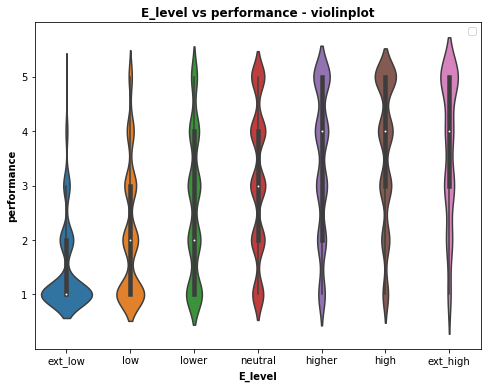

No handles with labels found to put in legend.


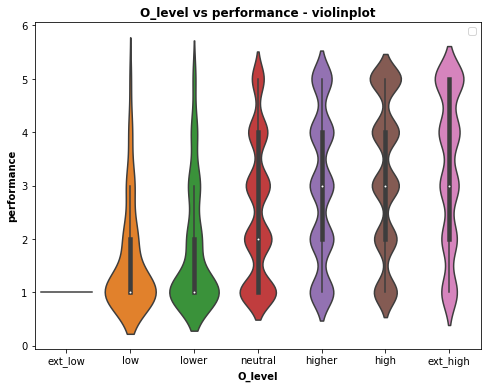

No handles with labels found to put in legend.


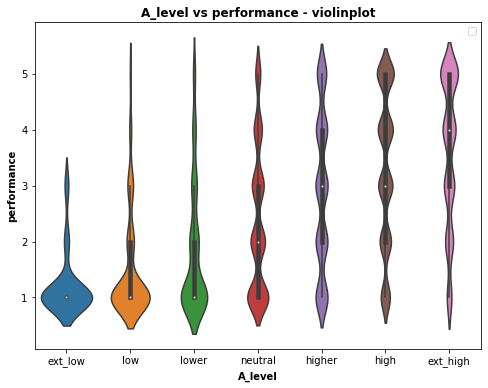

No handles with labels found to put in legend.


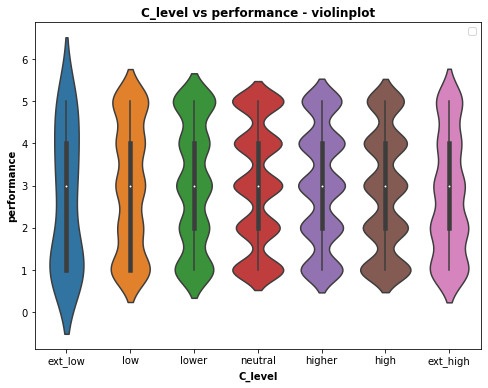

No handles with labels found to put in legend.


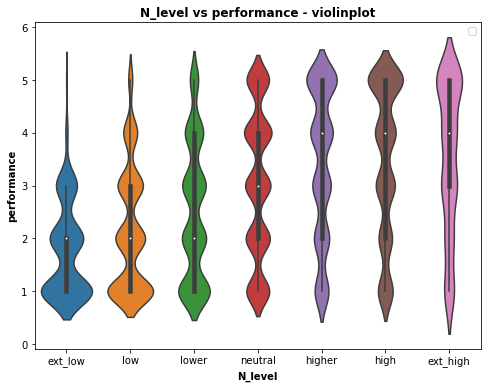

In [9]:
levels = ["E_level", "O_level", "A_level", "C_level", "N_level"]
for level in levels:
    plotter.plot(data, level, "performance", sns.violinplot, order=order)

No handles with labels found to put in legend.


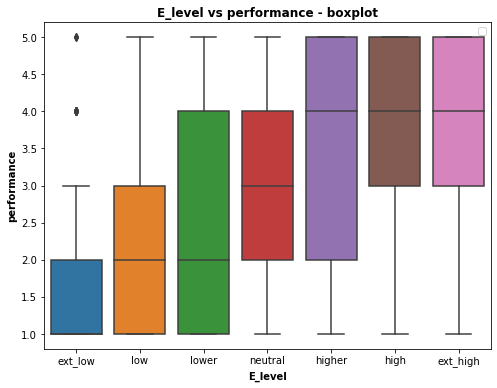

No handles with labels found to put in legend.


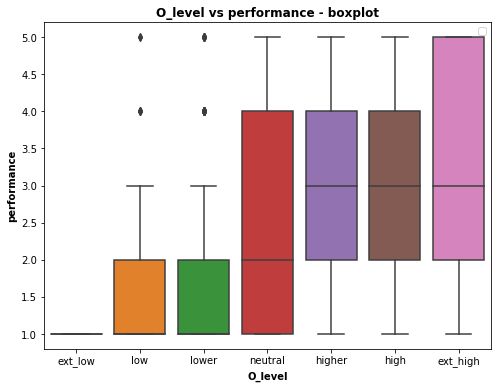

No handles with labels found to put in legend.


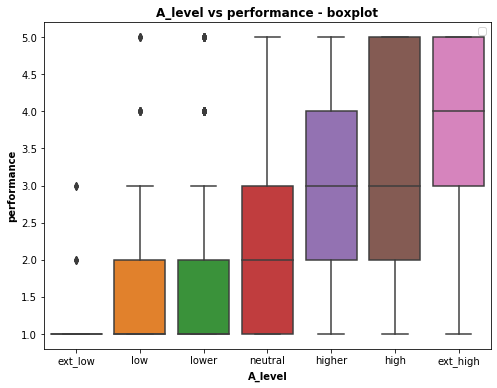

No handles with labels found to put in legend.


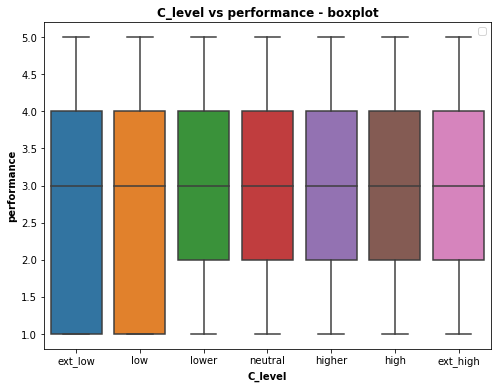

No handles with labels found to put in legend.


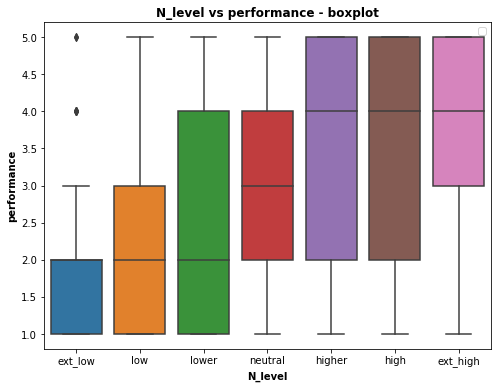

In [10]:
levels = ["E_level", "O_level", "A_level", "C_level", "N_level"]
for level in levels:
    plotter.plot(data, level, "performance", sns.boxplot, order=order)

In [13]:
data["age"].unique()

array([ 53,  46,  14,  19,  25,  31,  20,  23,  39,  18,  17,  15,  22,
        21,  28,  26,  29,  52,  48,  37,  42,  27,  60,  24,  47,  35,
        34,  36,  54,  45,  32,  49,  33,  16,  30,  59,  41,  44,  43,
        38,  40,  55,  58,  51,  57,  56,  68,  70,  50,  76,  63,  65,
        61,  69,  66,  74,  67,  62,  73,  64,  71,  72,  75,  92, 100,
        77,  97,  80,  99,  79,  78])